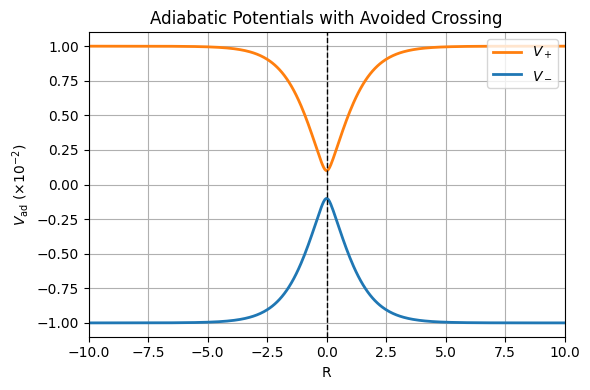

In [1]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Parameters
    A  = 0.01   # diabatic amplitude
    B  = 0.6    # steepness of tanh
    C  = 0.001  # diabatic coupling prefactor
    D  = 1.0    # width of Gaussian coupling

    # Coordinate grid
    R = np.linspace(-10, 10, 400)

    # Diabatic potentials that cross at R=0
    V11 =  A * np.tanh(B * R)
    V22 = -A * np.tanh(B * R)

    # Off-diagonal coupling
    V12 = C * np.exp(-D * R**2)

    # Compute adiabatic eigenvalues
    avg      = 0.5 * (V11 + V22)
    diff     = 0.5 * (V11 - V22)
    splitting = np.sqrt(diff**2 + V12**2)
    V_plus  = avg + splitting
    V_minus = avg - splitting

    # Rescale to 10⁻² units for plotting
    Vp = V_plus  / 0.01
    Vm = V_minus / 0.01

    # Plotting
    plt.figure(figsize=(6,4))
    plt.plot(R, Vp, color='tab:orange', lw=2, label=r'$V_+$')
    plt.plot(R, Vm, color='tab:blue',   lw=2, label=r'$V_-$')
    plt.axvline(0, color='k', linestyle='--', lw=1)
    plt.title('Adiabatic Potentials with Avoided Crossing')
    plt.xlabel('R')
    plt.ylabel(r'$V_{\mathrm{ad}}\ (\times10^{-2})$')
    plt.xlim(-10, 10)
    plt.ylim(-1.1, 1.1)
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()
